In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("hotel_bookings.csv")

In [3]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# **Clarify some summary statistics**

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Identifying all missing values

In [6]:
missing_values = df.isna().sum()
print(missing_values)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

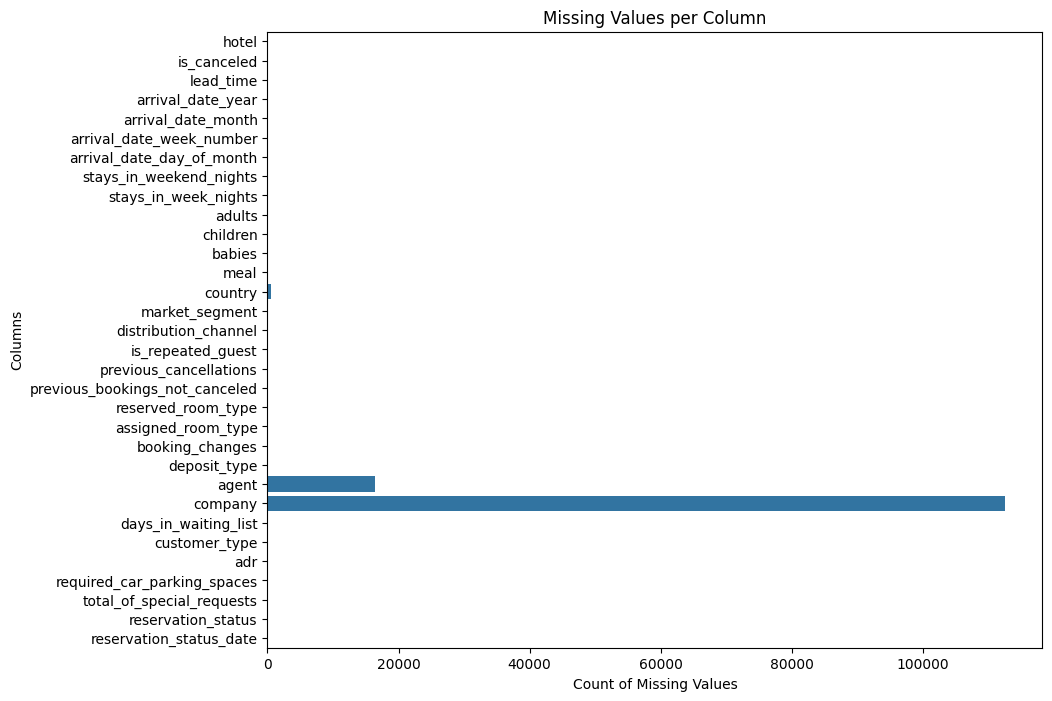

In [7]:
plt.figure(figsize=(10,8))
sns.barplot(x=missing_values.values, y=missing_values.index)
plt.title("Missing Values per Column")
plt.xlabel("Count of Missing Values")
plt.ylabel("Columns")
plt.show()

# Detecting outliears

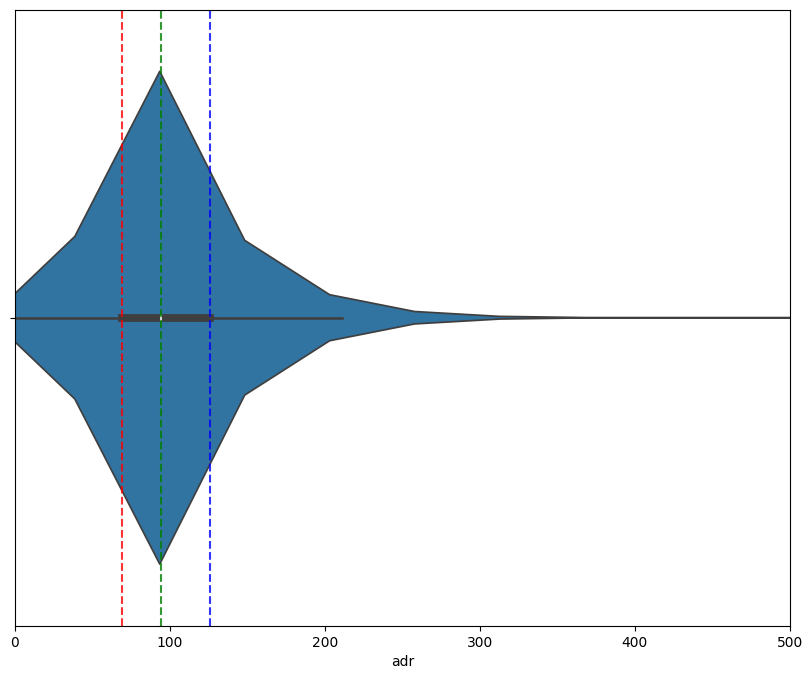

In [8]:
plt.figure(figsize=(10,8))
sns.violinplot(x=df["adr"])
plt.xlim(0, 500)

quantiles = df["adr"].quantile([0.25, 0.5, 0.75])
for q_val, color in zip(quantiles, ['red', 'green', 'blue']):
    plt.axvline(x=q_val, color=color, linestyle='--', alpha=0.8)

plt.show()

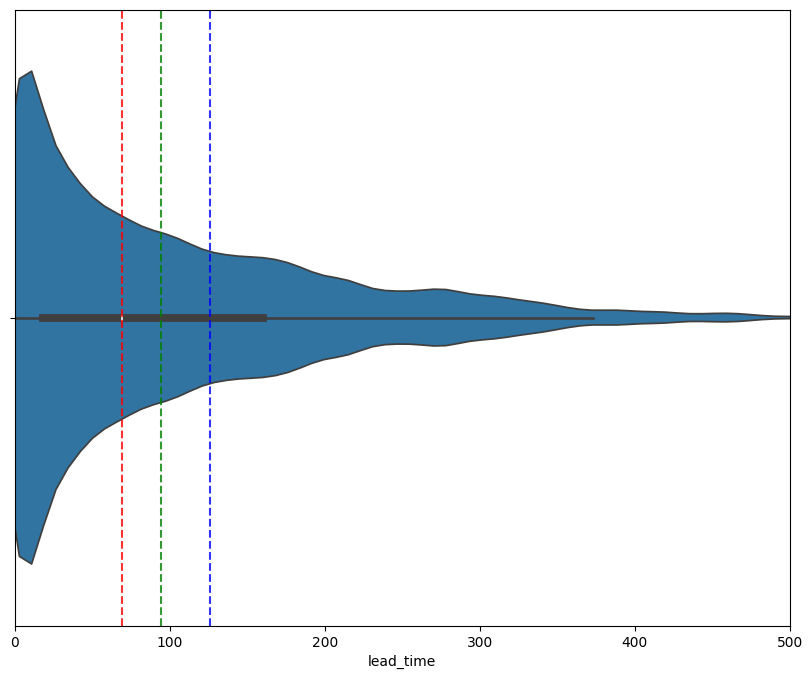

In [9]:
plt.figure(figsize=(10,8))
sns.violinplot(x=df["lead_time"])
plt.xlim(0, 500)

quantiles = df["adr"].quantile([0.25, 0.5, 0.75])
for q_val, color in zip(quantiles, ['red', 'green', 'blue']):
    plt.axvline(x=q_val, color=color, linestyle='--', alpha=0.8)

plt.show()

# From thee previous visualization i knew that there are some NaN values and some outliers

# Handling missing values

In [10]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Handling company column

In [11]:
df["company"] = df["company"].fillna("None")
df["company"].isna().sum()

np.int64(0)

# Handling agent column

In [12]:
df["agent"] = df["agent"].fillna("None")
df["agent"].isna().sum()

np.int64(0)

# Handling country column

In [13]:
df["country"] = df["country"].fillna(df["country"].mode()[0])
df["country"].isna().sum()

np.int64(0)

# Handling children column

In [14]:
df["children"] = df["children"].fillna(df["children"].median())
df["children"].isna().sum()

np.int64(0)

# Removing duplicates

In [15]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

# Handling outliers

In [16]:
df["adr"] = df["adr"].clip(upper=1000)
print(df["adr"].describe())

count    87377.000000
mean       106.294754
std         52.095926
min         -6.380000
25%         72.000000
50%         98.100000
75%        134.000000
max       1000.000000
Name: adr, dtype: float64


In [17]:
df["lead_time"] = df["lead_time"].clip(upper=400)
print(df["lead_time"].describe())

count    87377.000000
mean        79.641931
std         84.891596
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        400.000000
Name: lead_time, dtype: float64


# Fixing data types

In [18]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,None,None,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,400,2015,July,27,1,0,0,2,...,No Deposit,None,None,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,None,None,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,None,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,None,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87377 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87377 non-null  object 
 1   is_canceled                     87377 non-null  int64  
 2   lead_time                       87377 non-null  int64  
 3   arrival_date_year               87377 non-null  int64  
 4   arrival_date_month              87377 non-null  object 
 5   arrival_date_week_number        87377 non-null  int64  
 6   arrival_date_day_of_month       87377 non-null  int64  
 7   stays_in_weekend_nights         87377 non-null  int64  
 8   stays_in_week_nights            87377 non-null  int64  
 9   adults                          87377 non-null  int64  
 10  children                        87377 non-null  float64
 11  babies                          87377 non-null  int64  
 12  meal                            8737

# Handling arrival date

In [20]:
import calendar

df["arrival_date_month"] = df["arrival_date_month"].apply(
    lambda x: list(calendar.month_name).index(x)
)

df["arrival_date"] = pd.to_datetime({
    "year": df["arrival_date_year"],
    "month": df["arrival_date_month"],
    "day": df["arrival_date_day_of_month"]
})

In [21]:
df["arrival_date"].head()

,arrival_date
0,2015-07-01
1,2015-07-01
2,2015-07-01
3,2015-07-01
4,2015-07-01


In [22]:
df = df.drop(columns=["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month" ,"arrival_date_week_number"])
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,None,None,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,400,0,0,2,0.0,0,BB,PRT,...,None,None,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,None,None,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,304.0,None,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,240.0,None,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


# Create new features

In [24]:
df["total_guests"] = df["adults"] + df["children"] + df["babies"]
df["total_guests"].head()

,total_guests
0,2.0
1,2.0
2,1.0
3,1.0
4,2.0


In [25]:
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df["total_nights"].head()

,total_nights
0,0
1,0
2,1
3,1
4,2


In [26]:
df["is_family"] = ((df["children"] > 0) | (df["babies"] > 0)).map({True: "Yes", False: "No"})
df["is_family"].head()

,is_family
0,No
1,No
2,No
3,No
4,No


# Encode categirical variables

# One-Hot Encoding

In [27]:
from sklearn.model_selection import train_test_split

low_cardinality = ["meal", "market_segment"]
df = pd.get_dummies(df, columns=low_cardinality, drop_first=True)

# Frequency Encoding

In [28]:
country_freq = df["country"].value_counts()

threshold = 50
df["country"] = df["country"].apply(lambda x: x if country_freq[x] >= threshold else "Other")
df["country"] = df["country"].map(df["country"].value_counts())

# Removing Data Leakage Columns

In [29]:
df = df.drop(columns=["reservation_status", "reservation_status_date"], errors="ignore")

# Spliting into Train & Test

In [30]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (69901, 39)
Test shape: (17476, 39)
